In [52]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [53]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [54]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [55]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [56]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with=engine)

In [57]:
# View all of the classes that automap found
Base.classes.keys()

['station', 'measurement']

In [58]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [59]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [60]:
# Find the most recent date in the data set.
most_recent = session.query(Measurement.date).order_by(Measurement.id.desc()).first()
most_recent

('2017-08-23',)

Text(0, 0.5, 'Inches')

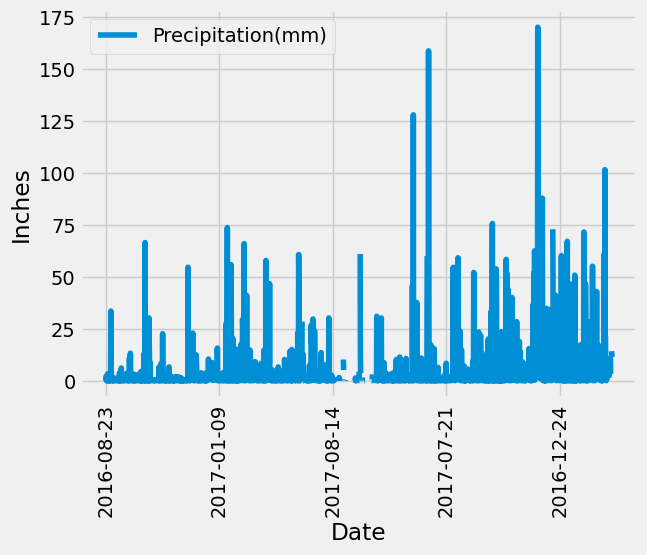

In [61]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
# Calculate the date one year from the last date in data set.
date = dt.datetime(2017, 8, 22) - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
sel = [Measurement.date, Measurement.prcp]

results = session.query(*sel).\
    filter(Measurement.date >= date).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
precipitation_df = pd.DataFrame(results, columns = ['Date', 'Precipitation(mm)'])

# Sort the dataframe by date
precipitation_df.sort_values(by=['Date'])

# Use Pandas Plotting with Matplotlib to plot the data
precipitation_df.plot(x='Date', y='Precipitation(mm)', rot=90)
plt.xlabel("Date")
plt.ylabel("Inches")

In [62]:
# Use Pandas to calculate the summary statistics for the precipitation data
summary_describe = pd.DataFrame(precipitation_df.describe())
summary_describe

,Precipitation(mm)
count,2021.000000
mean,4.505888
std,11.713487
min,0.000000
25%,0.000000
50%,0.500000
75%,3.300000
max,170.200000


# Exploratory Station Analysis

In [63]:
# Design a query to calculate the total number of stations in the dataset
total_stations = session.query(Station).count()
total_stations

9

In [64]:
session.query(Station).first().__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x2cb9c4afa60>,
 'id': 0,
 'latitude': 21.2716,
 'elevation': 0.914,
 'station': 'USC00519397',
 'name': 'WAIKIKI 717.2, HI US',
 'longitude': -157.8168}

In [65]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
sel2 = [Measurement.station, func.count(Measurement.station)]

station_results = session.query(*sel2).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.date).desc()).all()

station_results

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [66]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active_sel = [func.min(Measurement.tobs),
                   func.max(Measurement.tobs),
                   func.avg(Measurement.tobs)]

most_active_results = session.query(*most_active_sel).\
    filter(Measurement.station == station_results[0][0]).all()

most_active_results

[(12.2, 29.4, 22.03582251082252)]

(0.0, 7.0)

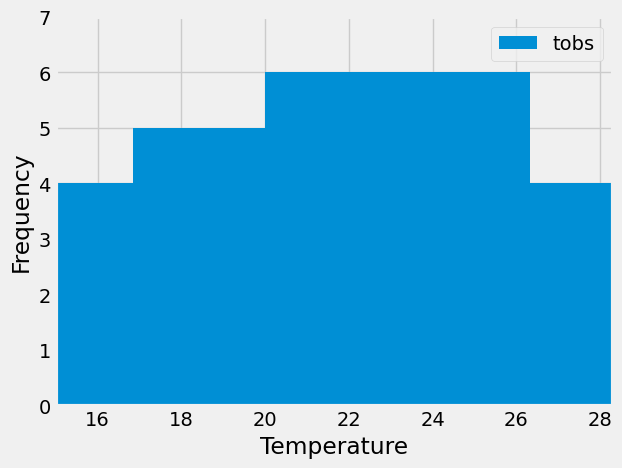

In [67]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
active_station_sel = [Measurement.tobs, func.count(Measurement.station)]

active_station_results = session.query(*active_station_sel).\
    filter(Measurement.station == station_results[0][0]).\
    filter(Measurement.date >= date).\
    group_by(Measurement.tobs).all()

station_df = pd.DataFrame(active_station_results, columns = ['tobs', 'Frequency'])
station_df.plot.hist(column = ['tobs'], bins=12)
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.xlim(min(station_df['tobs']), max(station_df['tobs']))
plt.ylim(0,7)

# Close Session

In [68]:
# Close Session
session.close()